# Enade 2018

A prova do Enade afere o desempenho dos estudantes em relação aos conteúdos programáticos previstos nas Diretrizes Curriculares Nacionais ou no Catálogo Nacional de Cursos Superiores de Tecnologia do respectivo curso de graduação, suas habilidades para  ajustamento às exigências decorrentes da evolução do conhecimento e suas competências  para compreender temas exteriores ao âmbito específico de sua profissão, ligados à realidade  brasileira e mundial e a outras áreas do conhecimento.

As provas são compostas por uma parte de Formação Geral, comum aos cursos de todas as áreas, e uma parte de Componente Específico, própria de cada área de avaliação. A parte de Formação Geral tem 10 questões, sendo duas discursivas e oito de de múltipla escolha, envolvendo situações-problema e estudos de casos. A concepção dos itens é balizada pelos princípios dos Direitos Humanos. As questões discursivas avaliam aspectos como clareza, coerência, coesão, estratégias argumentativas, utilização de vocabulário adequado e correção gramatical do texto. Já a parte de Componente Específico de cada área de avaliação tem 30 questões, sendo três discursivas e 27 de múltipla escolha, envolvendo situações-problema e estudos de casos.

Fonte: INEP

Após os resultados do Data Mining : Regras de Associação, testaremos outra tecnica para obter perfis de alunos.

Portanto, o presente trabalho tem como objetivo compreender através da aplicação de técnicas de mineração de dados no dataset do ENADE de 2018 possíveis correlações entre fatores socioeconômicos, educacionais e o desempenho dos alunos

Os dados foram obtidos a partir do site do Governo Federal (2020) que contém dados do exame realizado no ano de 2018, possibilitando assim uma grande gama de informações que possibilitou uma análise exploratória dos dados direcionando-se nas características que impactam diretamente na nota no aluno, como fatores socioeconômico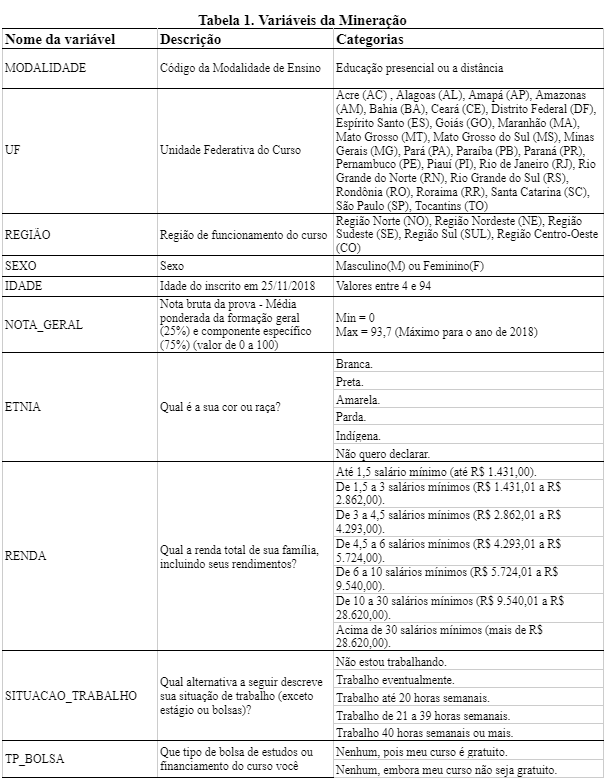
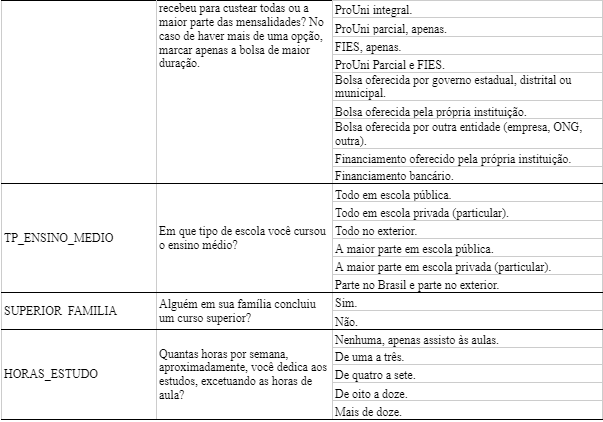

## Data Mining : Arvore de classificação

A tecnica usada para descobrir padrões e regras entre os estudantes foi a Arvore de Classificação.A árvore de classificação são recomendados quando a tarefa de mineração de dados contém classificações ou previsões de resultados e o objetivo é gerar regras que podem ser facilmente explicadas e traduzidas em SQL ou em uma linguagem de consulta natural.

Uma árvore de classificação rotula, registra e atribui variáveis a classes discretas. Uma árvore de classificação também pode fornecer uma medida de confiança de que a classificação está correta.




### Impotando bilbiotecas

In [199]:
!pip install apyori

In [200]:
import numpy as np
from IPython.display import clear_output
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
#sys.path.append('../utils/')
from sklearn.inspection import plot_partial_dependence
from apyori import apriori
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree, export_text
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc
from sklearn.inspection import plot_partial_dependence
from IPython.display import clear_output
import sklearn



### Lendo Dataset

In [201]:
# dataset = pd.read_csv('microdados_enade_2018/2018/3.DADOS/microdados_enade_2018.txt', sep=';',nrows=5000,header=0, index_col=False, encoding="ISO-8859-1")
#dataset/2004/2.DADOS/microdados_enade_2004.csv
dataset = pd.read_csv('/content/microdados_enade_2018.txt', sep=';',header=0, index_col=False, encoding="ISO-8859-1")

In [202]:
dataset

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_INSCRICAO_ADM,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,TP_SFG_D1,...,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,QE_I37,QE_I38,QE_I39,QE_I40,QE_I41,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,22,M,2013,2015.0,4.0,0,0,8,0,0,0,27,1,8,0,CACBEBDE,CACBEBDE,ADBBDEDCEEDCAEZADBCBDABECBB,XXBXDEDXEEDCAEZADBCBXAXECXX,CACCDDDD,11100010.0,BADBDADAEACAABAADBECBDACCCA,990910191000108111009090199,555,555,555,555,555,555,555,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,49,F,1988,2015.0,4.0,0,0,8,0,0,0,27,1,8,0,CACBEBDE,CACBEBDE,ADBBDEDCEEDCAEZADBCBDABECBB,XXBXDEDXEEDCAEZADBCBXAXECXX,CAADEDDE,11001011.0,BBDBEEDAEBCEAEBADBCBBEAECCA,990901191000118111119091199,555,555,555,555,555,555,555,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,23,M,2013,2015.0,4.0,0,0,8,0,0,0,27,1,8,0,CACBEBDE,CACBEBDE,ADBBDEDCEEDCAEZADBCBDABECBB,XXBXDEDXEEDCAEZADBCBXAXECXX,CAAACBBE,11000101.0,CDDBDCDAEEDCACDADDCBBDAECCA,990910191111108110119091199,555,555,555,555,555,555,555,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,25,M,2011,2015.0,4.0,0,0,8,0,0,0,27,1,8,0,CACBEBDE,CACBEBDE,ADBBDEDCEEDCAEZADBCBDABECBB,XXBXDEDXEEDCAEZADBCBXAXECXX,BAADDBCC,1000100.0,BACAAADBEBEACDDBCACBAABACBC,990900191000008000119190199,555,555,555,555,555,555,336,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,4.0
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,22,F,2014,2015.0,4.0,0,0,8,0,0,0,27,1,8,0,CACBEBDE,CACBEBDE,ADBBDEDCEEDCAEZADBCBDABECBB,XXBXDEDXEEDCAEZADBCBXAXECXX,CABBDBBE,11010101.0,BEDEDCDBBADADEDACEECAEAECCA,990910190010018100009091199,555,555,555,555,555,555,555,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548122,2018,1723,10008,10022,13,1105114,1,3547809,35,3,23,M,2013,2014.0,4.0,1,1,8,0,0,0,27,0,4,0,CACBEBDE,CACBEBDE,CDDBDADAEDBCCECBCEBACBACEEB,CDDBDADAEDBCXEXBCEBAXBACXEB,NaN,NaN,NaN,NaN,222,222,222,222,222,222,222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548123,2018,1201,10005,10022,22,50787,1,3144805,31,3,29,M,0,NaN,NaN,1,1,8,0,0,0,27,2,9,0,CACBEBDE,CACBEBDE,DAEBDCACCEBADDCAZZDCEBEDBAB,XXEXXCACCEBADXCAZZXXEBXDBXB,NaN,NaN,NaN,NaN,222,222,222,222,222,222,222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Pre-processing

Nessa etapa, retiramos tuplas com NaN e colunas desnecessarias para a análise

#### Será realizado um drop filtrado pela colunaTP_PRES (Presença do Aluno), pois onde contém 222,334, 444 ou 556, são pessoas/candidatos que ausentaram-se na prova ou foram eliminados, assim como as colunas de presença : TP_PR_GER,  TP_PR_OB_FG, TP_PR_DI_FG, TP_PR_OB_CE e TP_PR_DI_CE

In [203]:
# 222,334,444,556 -> pessoas ausentes ou eliminadas
auxList = []
for i in range(len(dataset.index)):
    if(dataset['TP_PRES'][i] != 555 or dataset['TP_PR_GER'][i] != 555 or dataset['TP_PR_OB_FG'][i] != 555 or dataset['TP_PR_DI_FG'][i] != 555 or dataset['TP_PR_OB_CE'][i] != 555 or dataset['TP_PR_DI_CE'][i] != 555):
        auxList.append(i)
        
dataset = dataset.drop(auxList, axis=0)
dataset = dataset.reset_index()

#### Eliminando tuplas na qual não possue nota bruta (NT_GER), pois é a variável mais importante pois armazena o desempenho do aluno

In [204]:
auxList =  dataset[dataset['NT_GER'].isnull()].index
dataset = dataset.drop(auxList, axis=0)
dataset = dataset.reset_index()

#### Informações sobre o dataset até o momento

In [205]:
dataset.describe()

,level_0,index,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_INSCRICAO_ADM,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_ACE_OFG,TP_PRES,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,TP_SFG_D1,TP_SFG_D2,TP_SCE_D1,TP_SCE_D2,TP_SCE_D3,NT_FG_D1,NT_FG_D1_PT,...,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,QE_I37,QE_I38,QE_I39,QE_I40,QE_I41,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
count,399959.000000,399959.00000,399959.0,399959.000000,399959.000000,399959.000000,399959.000000,3.999590e+05,399959.000000,3.999590e+05,399959.000000,399959.000000,399959.000000,399959.000000,399959.000000,399959.000000,399959.0,399959.0,399959.0,399959.0,399959.0,399959.0,399959.0,399959.000000,399959.000000,399959.0,3.999590e+05,399959.0,399959.0,399959.0,399959.0,399959.0,399959.0,399959.000000,399959.000000,399959.000000,399959.000000,399959.000000,399959.000000,399959.000000,...,394834.000000,393981.000000,394873.000000,390972.000000,395492.000000,394508.000000,394879.000000,395044.000000,392875.000000,394252.000000,391970.000000,379464.000000,392373.000000,395486.000000,375476.000000,368848.000000,383652.000000,329643.000000,385384.000000,384162.000000,393566.000000,333506.000000,360205.000000,307611.000000,292521.000000,381216.000000,392530.000000,384362.000000,394860.000000,386776.000000,388796.000000,372010.000000,390030.000000,365262.000000,359584.000000,384275.000000,365840.000000,383988.000000,368802.000000,384787.000000
mean,200023.781645,267994.14466,2018.0,1487.287269,8025.262594,10024.430229,67.478952,3.269406e+05,1.161584,3.463662e+06,34.450529,3.108189,28.765501,2008.639453,2014.467228,3.326616,0.0,0.0,8.0,0.0,0.0,0.0,27.0,0.453114,6.511880,0.0,5.759030e+06,555.0,555.0,555.0,555.0,555.0,555.0,542.328039,544.218820,529.625472,516.256506,531.445928,42.757725,61.606915,...,5.013254,4.937467,5.318913,5.163628,5.313116,5.283317,5.213030,5.216156,4.900342,4.927752,5.026959,4.642838,4.839688,5.167748,4.746269,4.661853,4.888714,4.404853,4.844511,4.666271,5.084314,5.047232,5.157691,4.048490,3.764294,5.074131,5.112931,4.871494,5.175736,5.088154,4.908716,4.694471,4.890162,4.886898,4.909857,4.935825,4.956134,5.163328,4.718253,4.930515
std,115492.569833,157181.30590,0.0,2527.927166,3979.993418,3.531613,180.445472,7.038336e+05,0.368069,8.608559e+05,8.605689,0.950739,8.067743,7.787121,1.727360,1.155708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.674336,2.425056,0.0,5.070206e+06,0.0,0.0,0.0,0.0,0.0,0.0,51.299959,47.568825,70.455857,84.147494,68.317063,19.579047,19.280602,...,1.297066,1.362837,1.165171,1.295051,1.148875,1.170972,1.195018,1.167393,1.368064,1.295228,1.273620,1.489338,1.502961,1.236639,1.555612,1.599621,1.453728,1.715003,1.438310,1.507930,1.257832,1.430272,1.286250,1.966822,2.069490,1.397323,1.221226,1.422153,1.180591,1.336295,1.444843,1.601065,1.434885,1.469280,1.451960,1.432337,1.513698,1.274373,1.581931,1.482851
min,0.000000,0.00000,2018.0,1.000000,93.000000,10019.000000,1.000000,1.000000e+00,1.000000,1.100023e+06,11.000000,1.000000,4.000000,1012.000000,1979.000000,1.000000,0.0,0.0,8.0,0.0,0.0,0.0,27.0,0.000000,0.000000,0.0,0.000000e+00,555.0,555.0,555.0,555.0,555.0,555.0,333.000000,333.000000,333.000000,333.000000,333.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,99998.500000,130559.50000,2018.0,322.000000,10002.000000,10022.000000,2.000000,2.0

#### Filtrando as colunas que serão utilizadas
O foco desse parte é deixar somente dados relacionados com os fatores socioeconômicos, educacionais e o desempenho dos alunos

In [206]:
dataset = dataset[['TP_SEXO','NU_IDADE','CO_UF_CURSO' , 'CO_REGIAO_CURSO','QE_I08','QE_I10'    ,'QE_I02','QE_I11'  ,'QE_I17'      ,'QE_I21'      ,'QE_I23'         ,'NU_ANO'   ,'NT_GER'    ,'NT_FG'       ,'NT_CE'    ,'TP_PRES','CO_ORGACAD','CO_MODALIDADE','CO_RS_I1','CO_RS_I2','CO_RS_I3','CO_RS_I4','CO_RS_I5','CO_RS_I9']]
dataset.columns = ['SEXO'   ,'IDADE'   ,'CO_UF_CURSO' , 'CO_REGIAO_CURSO', 'RENDA','S_TRABALHO','ETNIA' ,'TP_BOLSA','ENSINO_MEDIO','SUP_FAMILIAR','HORAS_DE_ESTUDO','ANO_ENADE','NOTA_GERAL','NOTA_F_GERAL', 'NOTA_ESP','TP_PRES','CO_ORGACAD','CO_MODALIDADE','CO_RS_I1','CO_RS_I2','CO_RS_I3','CO_RS_I4','CO_RS_I5','CO_RS_I9']

#### Conferindo a quantidade de colunas

In [207]:
len(dataset.columns)

24

#### Capturando informações básicas do dataset
Pode-se ver o tipo da coluna, para a plicação do algoritimo de data-mininf é necessario que o dataset esteja no formato de transações( one hot encoder )

In [208]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399959 entries, 0 to 399958
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SEXO             399959 non-null  object
 1   IDADE            399959 non-null  int64 
 2   CO_UF_CURSO      399959 non-null  int64 
 3   CO_REGIAO_CURSO  399959 non-null  int64 
 4   RENDA            397928 non-null  object
 5   S_TRABALHO       397928 non-null  object
 6   ETNIA            397928 non-null  object
 7   TP_BOLSA         397928 non-null  object
 8   ENSINO_MEDIO     397928 non-null  object
 9   SUP_FAMILIAR     397928 non-null  object
 10  HORAS_DE_ESTUDO  397928 non-null  object
 11  ANO_ENADE        399959 non-null  int64 
 12  NOTA_GERAL       399959 non-null  object
 13  NOTA_F_GERAL     399959 non-null  object
 14  NOTA_ESP         399959 non-null  object
 15  TP_PRES          399959 non-null  int64 
 16  CO_ORGACAD       399959 non-null  int64 
 17  CO_MODALID

#### Verificando a quantidade total de NaN/Null no dataset

In [209]:
dataset.isnull().sum().sum()

14217

#### Verificando a quantidade de NaN em cada coluna

In [210]:
for i in range(len(dataset.columns)):
    print(f'Coluna: {dataset.columns[i]} qtd: {dataset[dataset.columns[i]].isnull().sum().sum()}')

Coluna: SEXO qtd: 0
Coluna: IDADE qtd: 0
Coluna: CO_UF_CURSO qtd: 0
Coluna: CO_REGIAO_CURSO qtd: 0
Coluna: RENDA qtd: 2031
Coluna: S_TRABALHO qtd: 2031
Coluna: ETNIA qtd: 2031
Coluna: TP_BOLSA qtd: 2031
Coluna: ENSINO_MEDIO qtd: 2031
Coluna: SUP_FAMILIAR qtd: 2031
Coluna: HORAS_DE_ESTUDO qtd: 2031
Coluna: ANO_ENADE qtd: 0
Coluna: NOTA_GERAL qtd: 0
Coluna: NOTA_F_GERAL qtd: 0
Coluna: NOTA_ESP qtd: 0
Coluna: TP_PRES qtd: 0
Coluna: CO_ORGACAD qtd: 0
Coluna: CO_MODALIDADE qtd: 0
Coluna: CO_RS_I1 qtd: 0
Coluna: CO_RS_I2 qtd: 0
Coluna: CO_RS_I3 qtd: 0
Coluna: CO_RS_I4 qtd: 0
Coluna: CO_RS_I5 qtd: 0
Coluna: CO_RS_I9 qtd: 0


### OBS:
### Infelizmente não conseguimos achar o motivo das variáveis S_TRABALHO, RENDA, ETNIA, TP_BOLSA, ENSINO_MEDIO SUP_FAMILIAR e HORAS_DE_ESTUDO conterem as mesmas quantidades de dados NaN, para não perder muito tempo, preferi eliminar as respectivas linhas, não afetando de forma signficativa o dataset pela baixa quantidade de NaN 

In [211]:
dataset = dataset.dropna()
dataset = dataset.reset_index()
len(dataset.dropna())

397928

### Organizando as Variáveis (ajustando a tipagem)


Object pata Float

In [212]:
dataset['NOTA_GERAL'] = dataset['NOTA_GERAL'].str.replace(',','.').astype(float)
dataset['NOTA_ESP'] = dataset['NOTA_ESP'].str.replace(',','.').astype(float)
dataset['NOTA_F_GERAL'] = dataset['NOTA_F_GERAL'].str.replace(',','.').astype(float)

#### Object para String

In [213]:
for i in range(len(dataset.columns)):
    if dataset[dataset.columns[i]].dtype == object :
        print("convert ", dataset[dataset.columns[i]].name, " to string")
        dataset[dataset.columns[i]] = dataset[dataset.columns[i]].astype(str)

convert  SEXO  to string
convert  RENDA  to string
convert  S_TRABALHO  to string
convert  ETNIA  to string
convert  TP_BOLSA  to string
convert  ENSINO_MEDIO  to string
convert  SUP_FAMILIAR  to string
convert  HORAS_DE_ESTUDO  to string
convert  CO_RS_I1  to string
convert  CO_RS_I2  to string
convert  CO_RS_I3  to string
convert  CO_RS_I4  to string
convert  CO_RS_I5  to string
convert  CO_RS_I9  to string


In [214]:
print('Nota Geral',np.max(dataset['NOTA_GERAL']))
print('Nota de Formação Geral',np.max(dataset['NOTA_F_GERAL']))
print('Nota Especifica',np.max(dataset['NOTA_ESP']))

Nota Geral 93.7
Nota de Formação Geral 99.2
Nota Especifica 97.5


In [215]:
print('Nota Geral',np.min(dataset['NOTA_GERAL']))
print('Nota de Formação Geral',np.min(dataset['NOTA_F_GERAL']))
print('Nota Especifica',np.min(dataset['NOTA_ESP']))

Nota Geral 0.0
Nota de Formação Geral 0.0
Nota Especifica 0.0


In [216]:
list_nota = list(dataset['NOTA_GERAL'])
class_nota_geral = []
#
for i in list_nota:
    if float(i) < 20:
        class_nota_geral.append('A')
    elif float(i) >= 20 and float(i) < 40:
        class_nota_geral.append('B')        
    elif float(i) >= 40 and float(i) < 60:
        class_nota_geral.append('C')        
    elif float(i) >= 60 and float(i) < 80:
        class_nota_geral.append('D')        
    elif float(i) >= 80:
        class_nota_geral.append('E')
    
        
dataset['CLASS_NOTA_GERAL'] = class_nota_geral

In [217]:
list_reg = list(dataset['CO_REGIAO_CURSO'])
reg = []
#
for i in list_reg:
    if int(i) == 1:
        reg.append('Norte')
    elif int(i) == 2:
        reg.append('Nordeste')        
    elif int(i) == 3:
        reg.append('Sudeste')        
    elif int(i) == 4:
        reg.append('Sul')        
    elif int(i) == 5:
        reg.append('Centro Oeste')
        
dataset['REGIAO'] = reg

In [218]:
list_ = list(dataset['CO_MODALIDADE'])
class_ = []
#
for i in list_:
    if i == 1:
        class_.append('PRESENCIAL')
    elif i == 2:
        class_.append('DISTÂNCIA')        
    
dataset['MODALIDADE'] = class_

### Seleção de colunas 
Para facilitar, não usaremos todas as colunas relacionadas a pesquisa socioeconomica fornecidos pelo dataset, muitas colunas utilizam são redundantes.

#### Pontos a serem analisados:


1.   Sexo
2.   Renda
3.   Idade
4.   Situação trabalhista
5.   Etnia
6.   Bolsa de Estudo
7.   Tipo de ensino medio
8.   Se possui membro com ensino superior
9.   Horas de estudo
11.  Nota geral



In [219]:
#dataset = dataset[['SEXO'   ,'IDADE'   ,'UF' , 'REGIAO', 'RENDA','S_TRABALHO','ETNIA' ,'TP_BOLSA','ENSINO_MEDIO','SUP_FAMILIAR','HORAS_DE_ESTUDO','ANO_ENADE','NOTA_GERAL','NOTA_F_GERAL', 'NOTA_ESP','TP_PRES','MODALIDADE', 'CLASS_NOTA_ESP', 'CLASS_NOTA_F_GERAL', 'CLASS_NOTA_GERAL']]
dataset_ger = dataset[[
    #'IDADE',
                       #'SEXO', 
                       'RENDA','S_TRABALHO','ETNIA','TP_BOLSA','ENSINO_MEDIO','SUP_FAMILIAR','HORAS_DE_ESTUDO']].copy()

In [220]:
dataset.to_csv('2018.csv')

In [221]:
dataset_ger

,RENDA,S_TRABALHO,ETNIA,TP_BOLSA,ENSINO_MEDIO,SUP_FAMILIAR,HORAS_DE_ESTUDO
0,C,A,D,H,A,A,B
1,D,E,A,H,A,A,C
2,E,E,A,H,A,B,D
3,D,A,A,H,A,A,E
4,E,A,B,H,A,B,B
...,...,...,...,...,...,...,...
397923,B,D,A,B,E,B,B
397924,D,E,A,B,B,A,B
397925,A,A,A,A,A,A,A
397926,C,E,C,H,D,A,B


In [222]:
features = [
            'RENDA_(<1.5)', 'RENDA_(>=_1.5_E_< 3)', 'RENDA_(>=3_E_<_4.5)', 'RENDA_(>=4.5_E_< 6)', 'RENDA_(>=6 E < 10)', 'RENDA_(>=10_E_<_30)', 'RENDA_(_<=_30)' ,
            'N_TRABALHA','TRABALHA_EVENTUALMENTE',' TRABALHA_ATE_20H','TRABALHA_20_A_39','TRABALHA_40_OU_+',
            'ETNIA_BRANCA', 'ETNIA_PRETA', 'ETNIA_PARDA', 'ETNIA_D', 'ETNIA_INDIGENA', 'ETNIA_N_DECLARADA', 
            'GRATUITA','NENHUMA_PARTICULAR','PROUNI_INTEGRAL','PROUNI_PARCIAL_APENAS','FIES APENAS','PROUNI_E_FIES','BOLSA_GOVERNO','BOLSA_INSTITUICAO','BOLSA_ONG','FINANCIAMENTO_INSTITUTO','FINANCIAMENTO_BANCO',
            'ESCOLA_PUBLICA', 'ESCOLA_PRIVADA', 'ENSINO_MEDIO_EXTERIOR', 'MAIOR_PARTE ESCOLA_PUBLICA', 'MAIOR_PARTE_PRIVADA', 'ENSINO_MEDIO_BRASIL_EXTERIOR', 
            'SUP_FAMILIAR_SIM', 'SUP_FAMILIAR_NO',
            'ESTUDO_0H', 'ESTUDO_1H_A_3H', 'ESTTUDO_4H_A_7H ', 'ESTUDANDO_8H_A_12H', 'ESTUDANDO_12h']

### Transformando o dataset para o formato de transações ( one hot encoder )

In [223]:
one_hot_data = pd.get_dummies(dataset_ger,drop_first=False)

In [224]:
one_hot_data.columns = features
one_hot_data['CLASS_NOTA_GERAL'] = dataset['CLASS_NOTA_GERAL']
one_hot_data

,RENDA_(<1.5),RENDA_(>=_1.5_E_< 3),RENDA_(>=3_E_<_4.5),RENDA_(>=4.5_E_< 6),RENDA_(>=6 E < 10),RENDA_(>=10_E_<_30),RENDA_(_<=_30),N_TRABALHA,TRABALHA_EVENTUALMENTE,TRABALHA_ATE_20H,TRABALHA_20_A_39,TRABALHA_40_OU_+,ETNIA_BRANCA,ETNIA_PRETA,ETNIA_PARDA,ETNIA_D,ETNIA_INDIGENA,ETNIA_N_DECLARADA,GRATUITA,NENHUMA_PARTICULAR,PROUNI_INTEGRAL,PROUNI_PARCIAL_APENAS,FIES APENAS,PROUNI_E_FIES,BOLSA_GOVERNO,BOLSA_INSTITUICAO,BOLSA_ONG,FINANCIAMENTO_INSTITUTO,FINANCIAMENTO_BANCO,ESCOLA_PUBLICA,ESCOLA_PRIVADA,ENSINO_MEDIO_EXTERIOR,MAIOR_PARTE ESCOLA_PUBLICA,MAIOR_PARTE_PRIVADA,ENSINO_MEDIO_BRASIL_EXTERIOR,SUP_FAMILIAR_SIM,SUP_FAMILIAR_NO,ESTUDO_0H,ESTUDO_1H_A_3H,ESTTUDO_4H_A_7H,ESTUDANDO_8H_A_12H,ESTUDANDO_12h,CLASS_NOTA_GERAL
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,C
1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,C
2,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,D
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,B
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397923,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,A
397924,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,B
397925,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,C
397926,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,C


## Divisão do Dataset

O dataset geral está desbalanceado, existem mais ruplas com as classes B e C do que com as classes A e B. Para auxiliar, separamos o dataset em 2 subgrupos:


*   Dataset1 (Classes A e D)
*   Dataset2 (Classes C e B)

Além de resolver o problema de desbalancamento, teremos uma arvore mais detalhada para as classes



### Dividindo dataset com divisão proporcional das classes (NOTA GERAL) dataset 1


In [225]:
dataset_a = one_hot_data.loc[(one_hot_data['CLASS_NOTA_GERAL'] == 'A') ]
dataset_b = one_hot_data.loc[(one_hot_data['CLASS_NOTA_GERAL'] == 'B') ]
dataset_c = one_hot_data.loc[(one_hot_data['CLASS_NOTA_GERAL'] == 'C') ]
dataset_d = one_hot_data.loc[(one_hot_data['CLASS_NOTA_GERAL'] == 'D') ]
dataset_1 = pd.concat([dataset_a, dataset_d])
dataset_2 = pd.concat([dataset_b, dataset_c])

In [226]:
dataset_1

,RENDA_(<1.5),RENDA_(>=_1.5_E_< 3),RENDA_(>=3_E_<_4.5),RENDA_(>=4.5_E_< 6),RENDA_(>=6 E < 10),RENDA_(>=10_E_<_30),RENDA_(_<=_30),N_TRABALHA,TRABALHA_EVENTUALMENTE,TRABALHA_ATE_20H,TRABALHA_20_A_39,TRABALHA_40_OU_+,ETNIA_BRANCA,ETNIA_PRETA,ETNIA_PARDA,ETNIA_D,ETNIA_INDIGENA,ETNIA_N_DECLARADA,GRATUITA,NENHUMA_PARTICULAR,PROUNI_INTEGRAL,PROUNI_PARCIAL_APENAS,FIES APENAS,PROUNI_E_FIES,BOLSA_GOVERNO,BOLSA_INSTITUICAO,BOLSA_ONG,FINANCIAMENTO_INSTITUTO,FINANCIAMENTO_BANCO,ESCOLA_PUBLICA,ESCOLA_PRIVADA,ENSINO_MEDIO_EXTERIOR,MAIOR_PARTE ESCOLA_PUBLICA,MAIOR_PARTE_PRIVADA,ENSINO_MEDIO_BRASIL_EXTERIOR,SUP_FAMILIAR_SIM,SUP_FAMILIAR_NO,ESTUDO_0H,ESTUDO_1H_A_3H,ESTTUDO_4H_A_7H,ESTUDANDO_8H_A_12H,ESTUDANDO_12h,CLASS_NOTA_GERAL
77,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,A
98,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,A
151,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,A
196,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,A
210,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397874,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,D
397881,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,D
397883,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,D
397884,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,D


In [227]:
dataset_2

,RENDA_(<1.5),RENDA_(>=_1.5_E_< 3),RENDA_(>=3_E_<_4.5),RENDA_(>=4.5_E_< 6),RENDA_(>=6 E < 10),RENDA_(>=10_E_<_30),RENDA_(_<=_30),N_TRABALHA,TRABALHA_EVENTUALMENTE,TRABALHA_ATE_20H,TRABALHA_20_A_39,TRABALHA_40_OU_+,ETNIA_BRANCA,ETNIA_PRETA,ETNIA_PARDA,ETNIA_D,ETNIA_INDIGENA,ETNIA_N_DECLARADA,GRATUITA,NENHUMA_PARTICULAR,PROUNI_INTEGRAL,PROUNI_PARCIAL_APENAS,FIES APENAS,PROUNI_E_FIES,BOLSA_GOVERNO,BOLSA_INSTITUICAO,BOLSA_ONG,FINANCIAMENTO_INSTITUTO,FINANCIAMENTO_BANCO,ESCOLA_PUBLICA,ESCOLA_PRIVADA,ENSINO_MEDIO_EXTERIOR,MAIOR_PARTE ESCOLA_PUBLICA,MAIOR_PARTE_PRIVADA,ENSINO_MEDIO_BRASIL_EXTERIOR,SUP_FAMILIAR_SIM,SUP_FAMILIAR_NO,ESTUDO_0H,ESTUDO_1H_A_3H,ESTTUDO_4H_A_7H,ESTUDANDO_8H_A_12H,ESTUDANDO_12h,CLASS_NOTA_GERAL
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,B
13,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,B
16,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,B
24,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,B
37,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397908,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,C
397918,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,C
397921,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,C
397925,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,C


## Dataset 1


### Graficos de Divisão
#### Agora todas as classes(A, D) possuem a mesma representação no dataset de treino e test

In [228]:
handltext = ["A", "D" ]
labels = ["(Nota < 25)",  "(Nota >= 75)"]

#### As classes estão disbalanceadas e mal divididas no dataset, para que o batch de treino e teste tenham representações parecidas das classes utilizou-se o stratify

In [229]:
x_train, x_test, y_train, y_test = train_test_split(dataset_1.drop('CLASS_NOTA_GERAL', axis = 1),dataset_1['CLASS_NOTA_GERAL'],test_size=0.30, stratify = dataset_1['CLASS_NOTA_GERAL'])

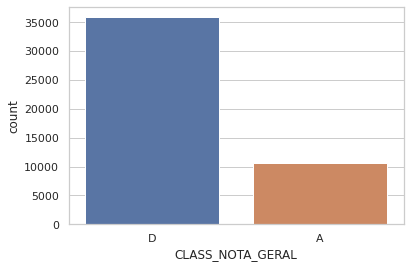

In [230]:
ax = sns.countplot(x="CLASS_NOTA_GERAL", data= pd.DataFrame(y_train, columns = ["CLASS_NOTA_GERAL"]))

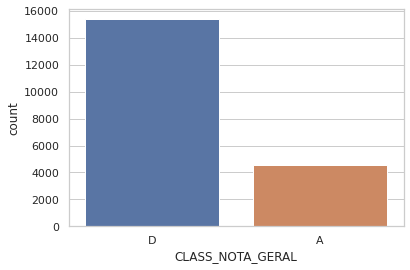

In [231]:
ax = sns.countplot(x="CLASS_NOTA_GERAL", data= pd.DataFrame(y_test, columns = ["CLASS_NOTA_GERAL"]))

### Arvore de Classificação
##### Preparando os parâmetros



In [232]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook as tqdm
from IPython.display import Image

##### Montando a arvore

In [233]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, class_weight = "balanced")
                              
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [234]:
y_pred = tree.predict(x_test)

#### Resultado da Classificação 

In [235]:
#labels = ["Nota < 20", "Nota >= 20 e < 40", "Nota >= 40 e < 60", "Nota >= 60 e < 80", "Nota >= 80"]
labels = ["Nota < 25","Nota >= 75"]
cm = confusion_matrix(y_test, y_pred)

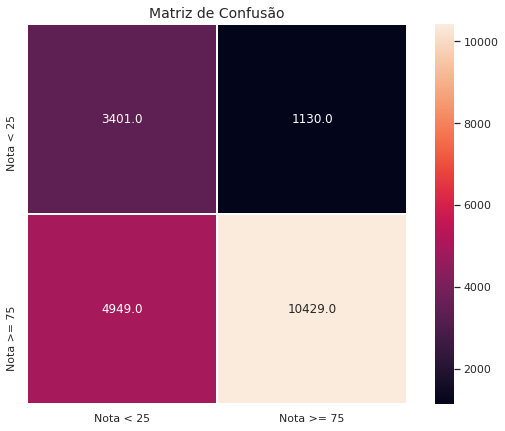

In [236]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm, annot=True , fmt = '.1f', square=1, linewidth=1. )
plt.title("Matriz de Confusão", fontsize = 14)
plt.show()

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.41      0.75      0.53      4531
           D       0.90      0.68      0.77     15378

    accuracy                           0.69     19909
   macro avg       0.65      0.71      0.65     19909
weighted avg       0.79      0.69      0.72     19909



In [238]:
def cat_1(list_):
    l = []
    for x in list_:
        if x == "A":
            l.append([1.,0.,0.,0.])
        if x == "B":
            l.append([0.,1.,0.,0.])
        if x == "C":
            l.append([0.,0.,1.,0.])
        if x == "D":
            l.append([0.,0.,0.,1.])
    return l

In [239]:
from sklearn.preprocessing import OneHotEncoder
y_test = cat_1(y_test)
y_pred = cat_1(y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)


print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)


Results of sklearn.metrics:
MAE: 0.15266964689336482
MSE: 0.15266964689336482


### Importância de atributos no modelo de classificação

O grafico mostra o peso dos atributos no resultado do modelo

In [240]:
features_i = pd.DataFrame(tree.feature_importances_, index = features, columns = ['imp'])
features_i = features_i[features_i['imp'] > 0.0]

[]

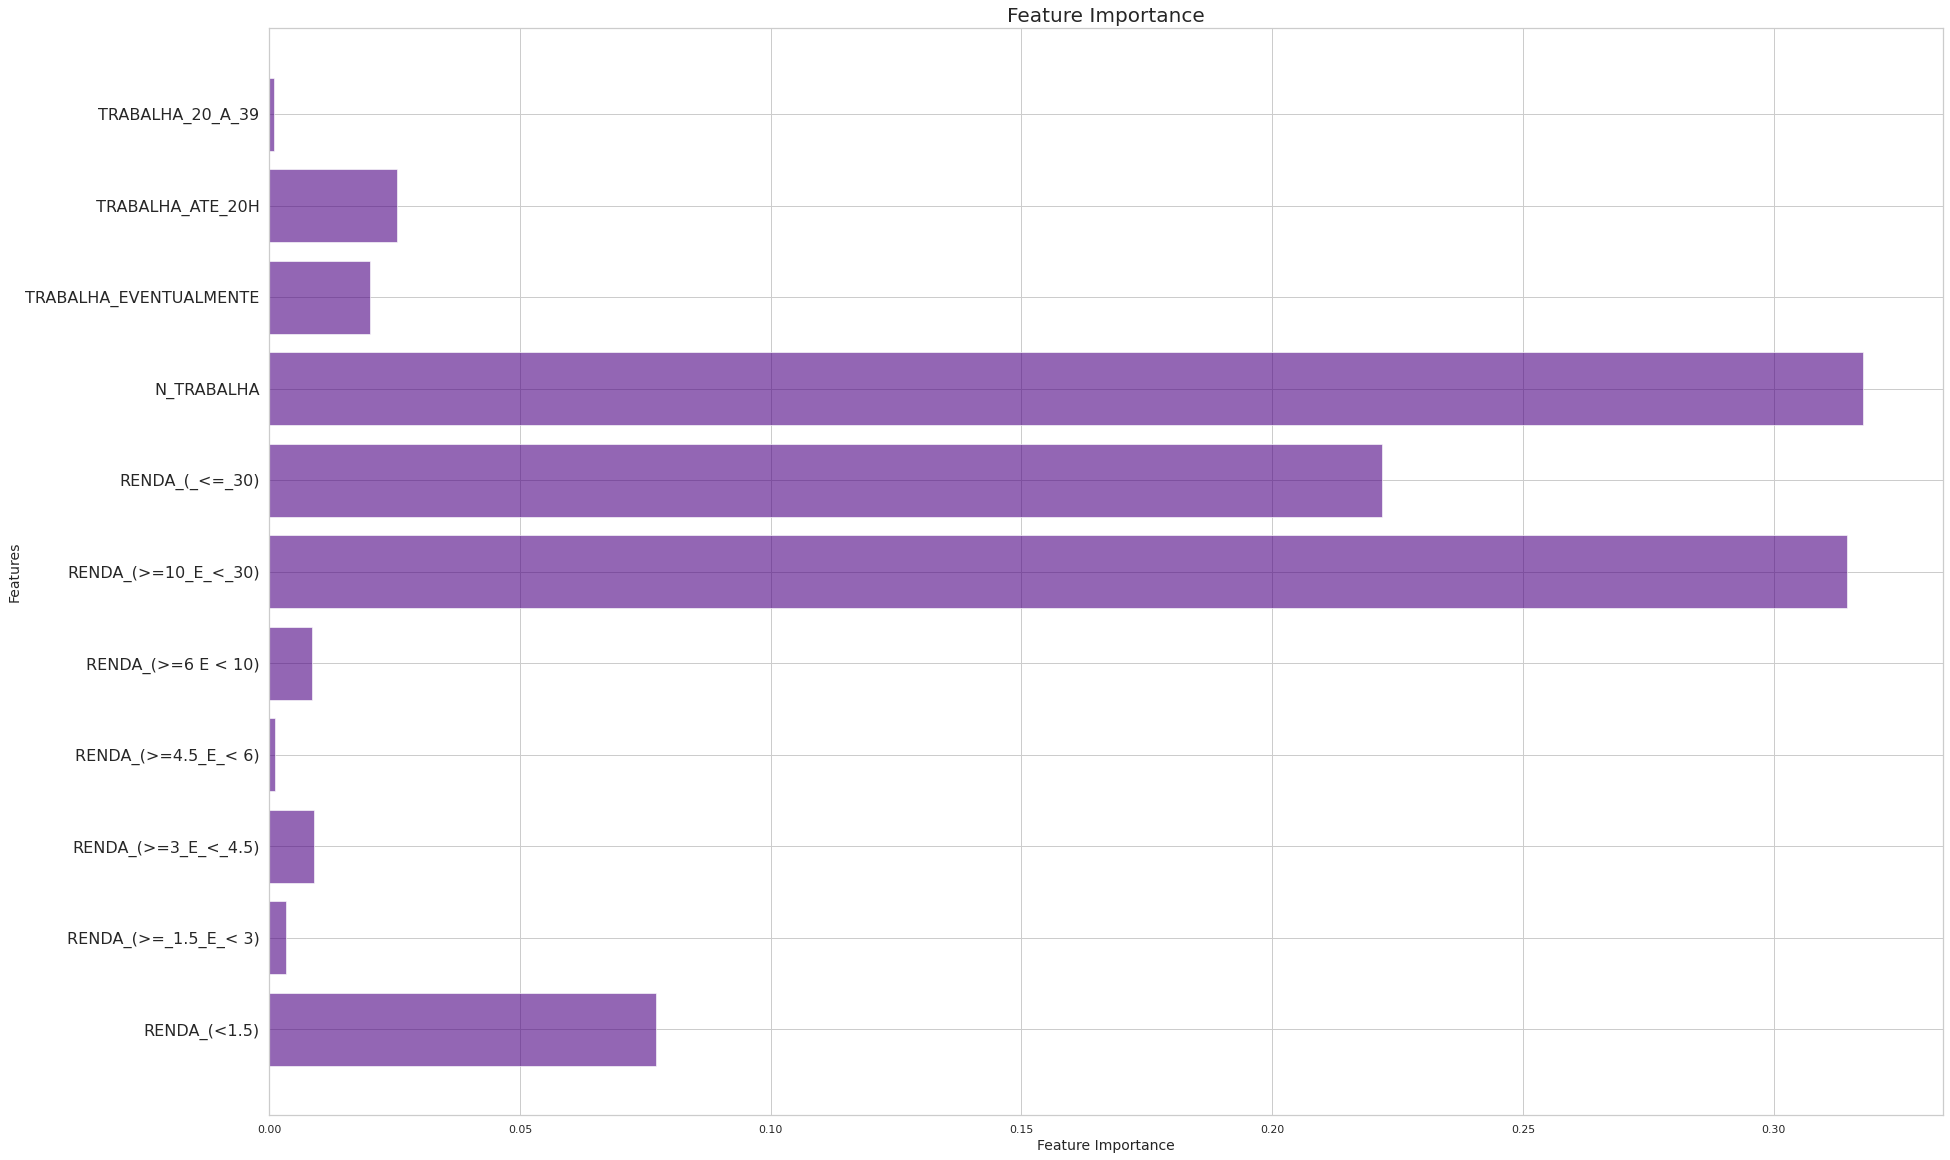

In [241]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(30, 20))
fig.tight_layout()
plt.barh(range(len(list(features_i['imp']))), list(features_i['imp']), color="indigo", align="center", alpha=0.6)
plt.yticks(np.arange(len(features)), features, rotation=0, fontsize=14)
plt.yticks(fontsize=16)
plt.ylabel("Features", fontsize=14)
plt.xlabel("Feature Importance", fontsize=14)
plt.title('Feature Importance', fontsize=20)
plt.plot()

#### Dependencia do modelo em relação as principais features
##### Classe A e D
###### atributos que não aparecem no plot tiveram peso igual a 0

In [242]:
dep = ['ESTUDO_1H_A_3H', 'ESCOLA_PRIVADA', 'PROUNI_INTEGRAL', 'GRATUITA', 'TRABALHA_40_OU_+', 'RENDA_(>=10_E_<_30)']
tree_disp_a = plot_partial_dependence(tree, x_train,dep, target = "A" )
plt.clf()
tree_disp_d = plot_partial_dependence(tree, x_train,dep, target = "D" )
plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Classe D')

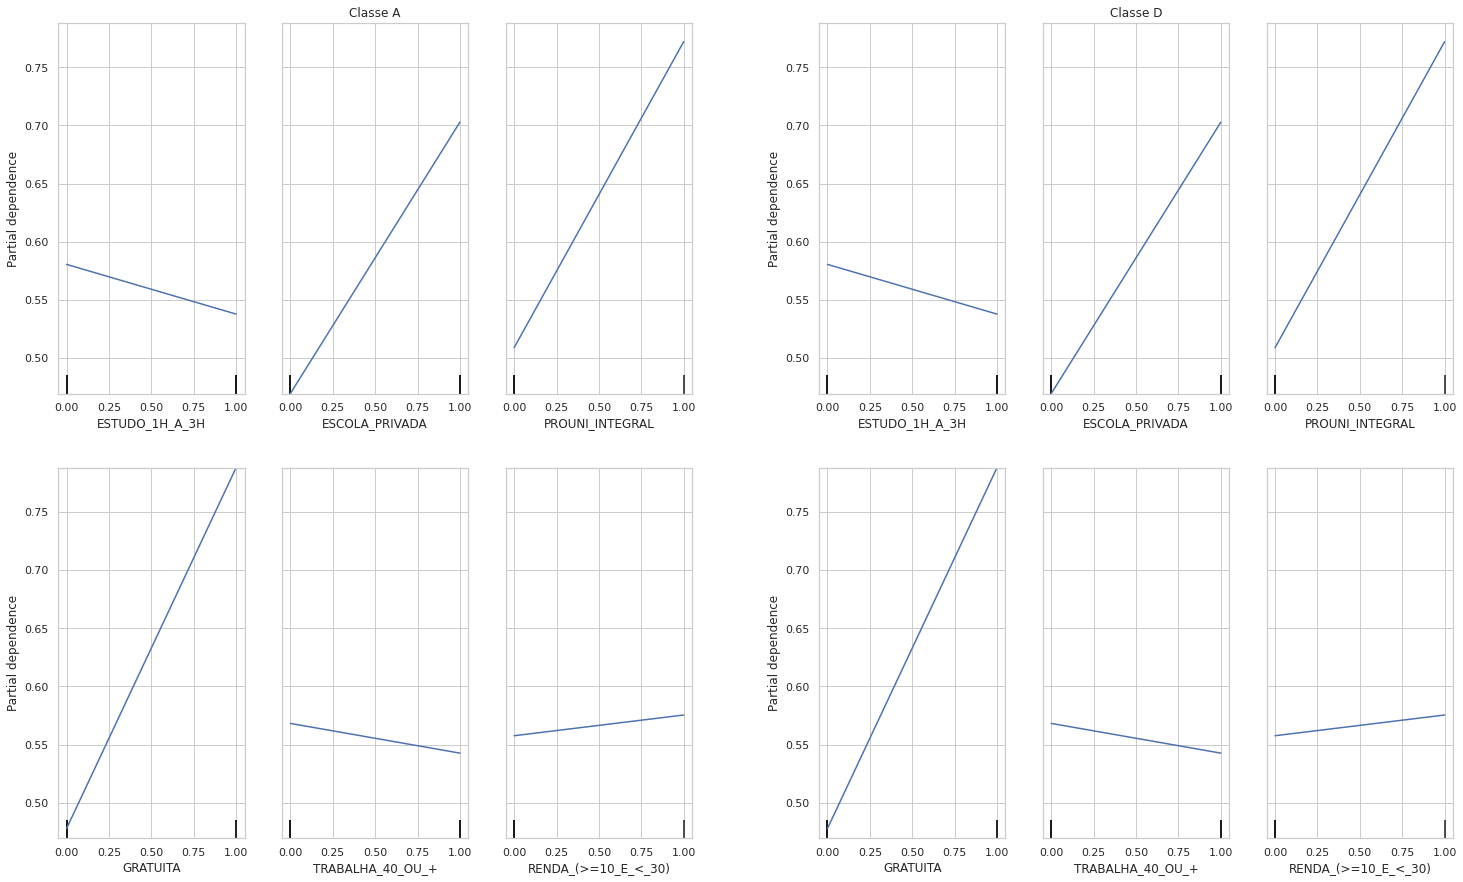

In [243]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 15))
tree_disp_a.plot(ax =ax1)
tree_disp_d.plot(ax = ax2)
ax1.set_title("Classe A")
ax2.set_title("Classe D")


#### Plotando a arvore

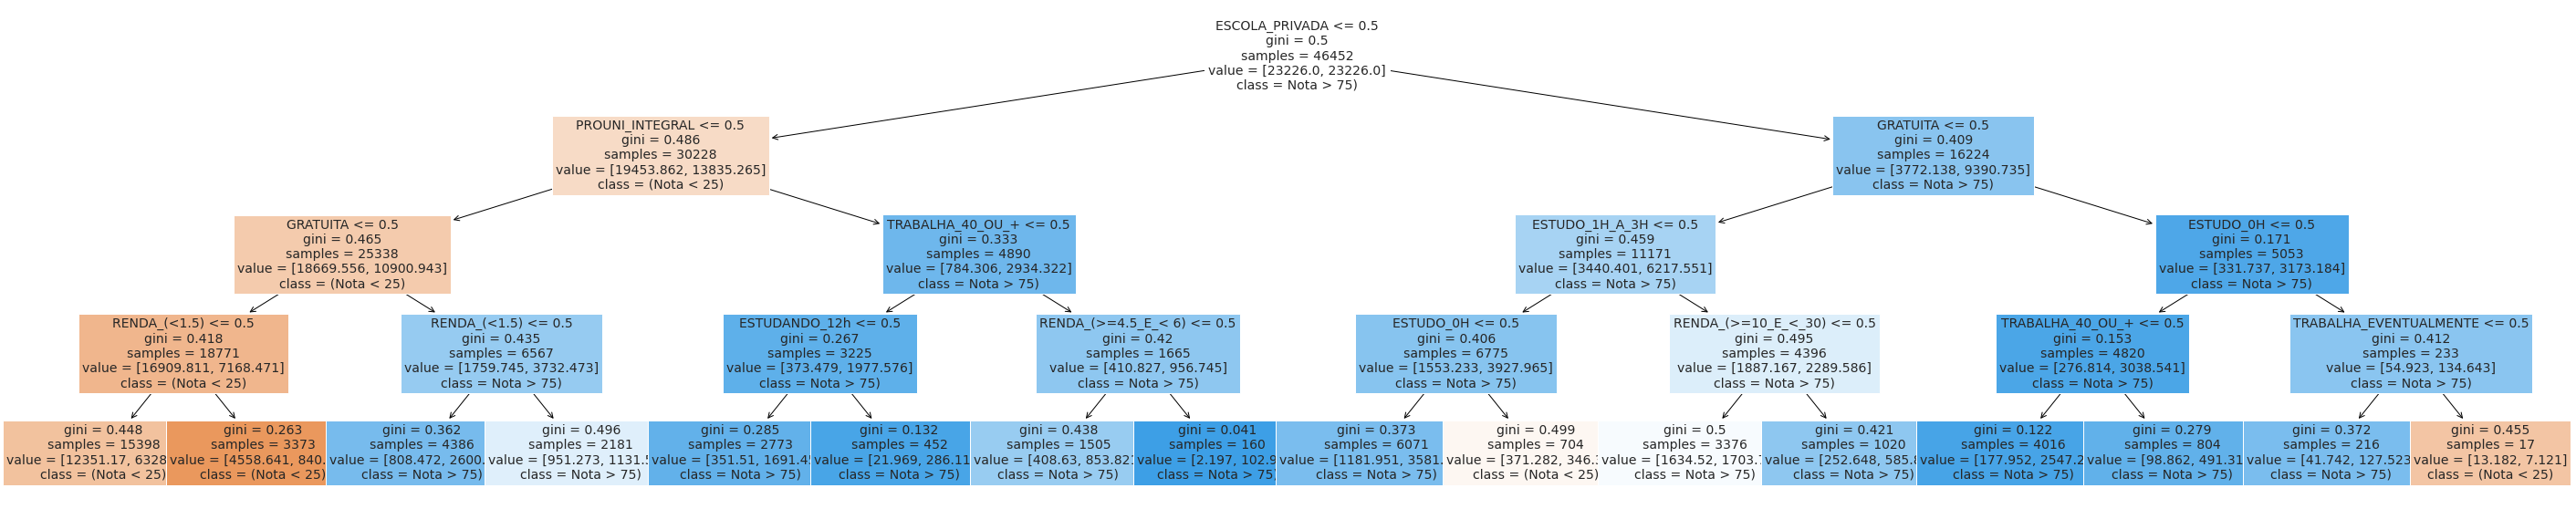

In [244]:
fig = plt.figure(figsize=(50,10))
out = plot_tree(tree, 
              feature_names=features,  
              class_names=["(Nota < 25)", "Nota > 75)"],
              filled=True,
              fontsize=14)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.savefig('2018_1.png')

## Dataset 2

### Dividindo dataset com divisão proporcional das classes (NOTA GERAL) dataset 2

In [245]:
x_train, x_test, y_train, y_test = train_test_split(dataset_2.drop('CLASS_NOTA_GERAL', axis = 1),dataset_2['CLASS_NOTA_GERAL'],test_size=0.30, stratify = dataset_2['CLASS_NOTA_GERAL'], shuffle = True)

In [246]:
handltext = ["B", "C", ]
labels = ["(25 <= Nota < 50 )",           
          "Nota >= 75)" ]


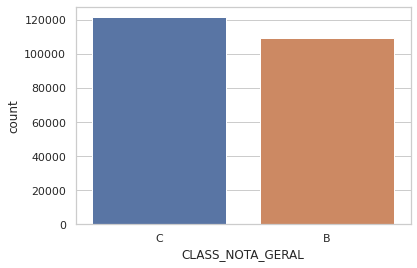

In [247]:
ax = sns.countplot(x="CLASS_NOTA_GERAL", data= pd.DataFrame(y_train, columns = ["CLASS_NOTA_GERAL"]))

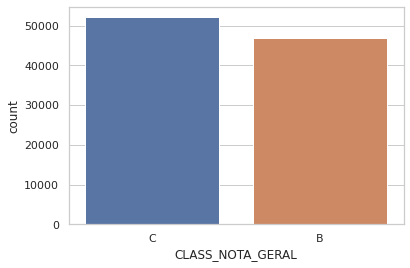

In [248]:
ax = sns.countplot(x="CLASS_NOTA_GERAL", data= pd.DataFrame(y_test, columns = ["CLASS_NOTA_GERAL"]))

### Arvore de Classificação
##### Preparando os parâmetros

In [249]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4,class_weight = "balanced"     )
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [250]:
y_pred = tree.predict(x_test)

#### Resultado da Classificação 

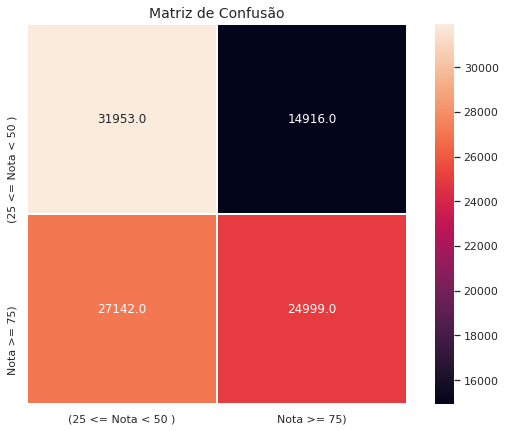

In [251]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm, annot=True , fmt = '.1f', square=1, linewidth=1. )
plt.title('Matriz de Confusão', fontsize=14)
plt.show()

In [252]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.54      0.68      0.60     46869
           C       0.63      0.48      0.54     52141

    accuracy                           0.58     99010
   macro avg       0.58      0.58      0.57     99010
weighted avg       0.59      0.58      0.57     99010



In [253]:
from sklearn.preprocessing import OneHotEncoder
y_test = cat_1(y_test)
y_pred = cat_1(y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)


print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)

Results of sklearn.metrics:
MAE: 0.2123926876073124
MSE: 0.2123926876073124


[]

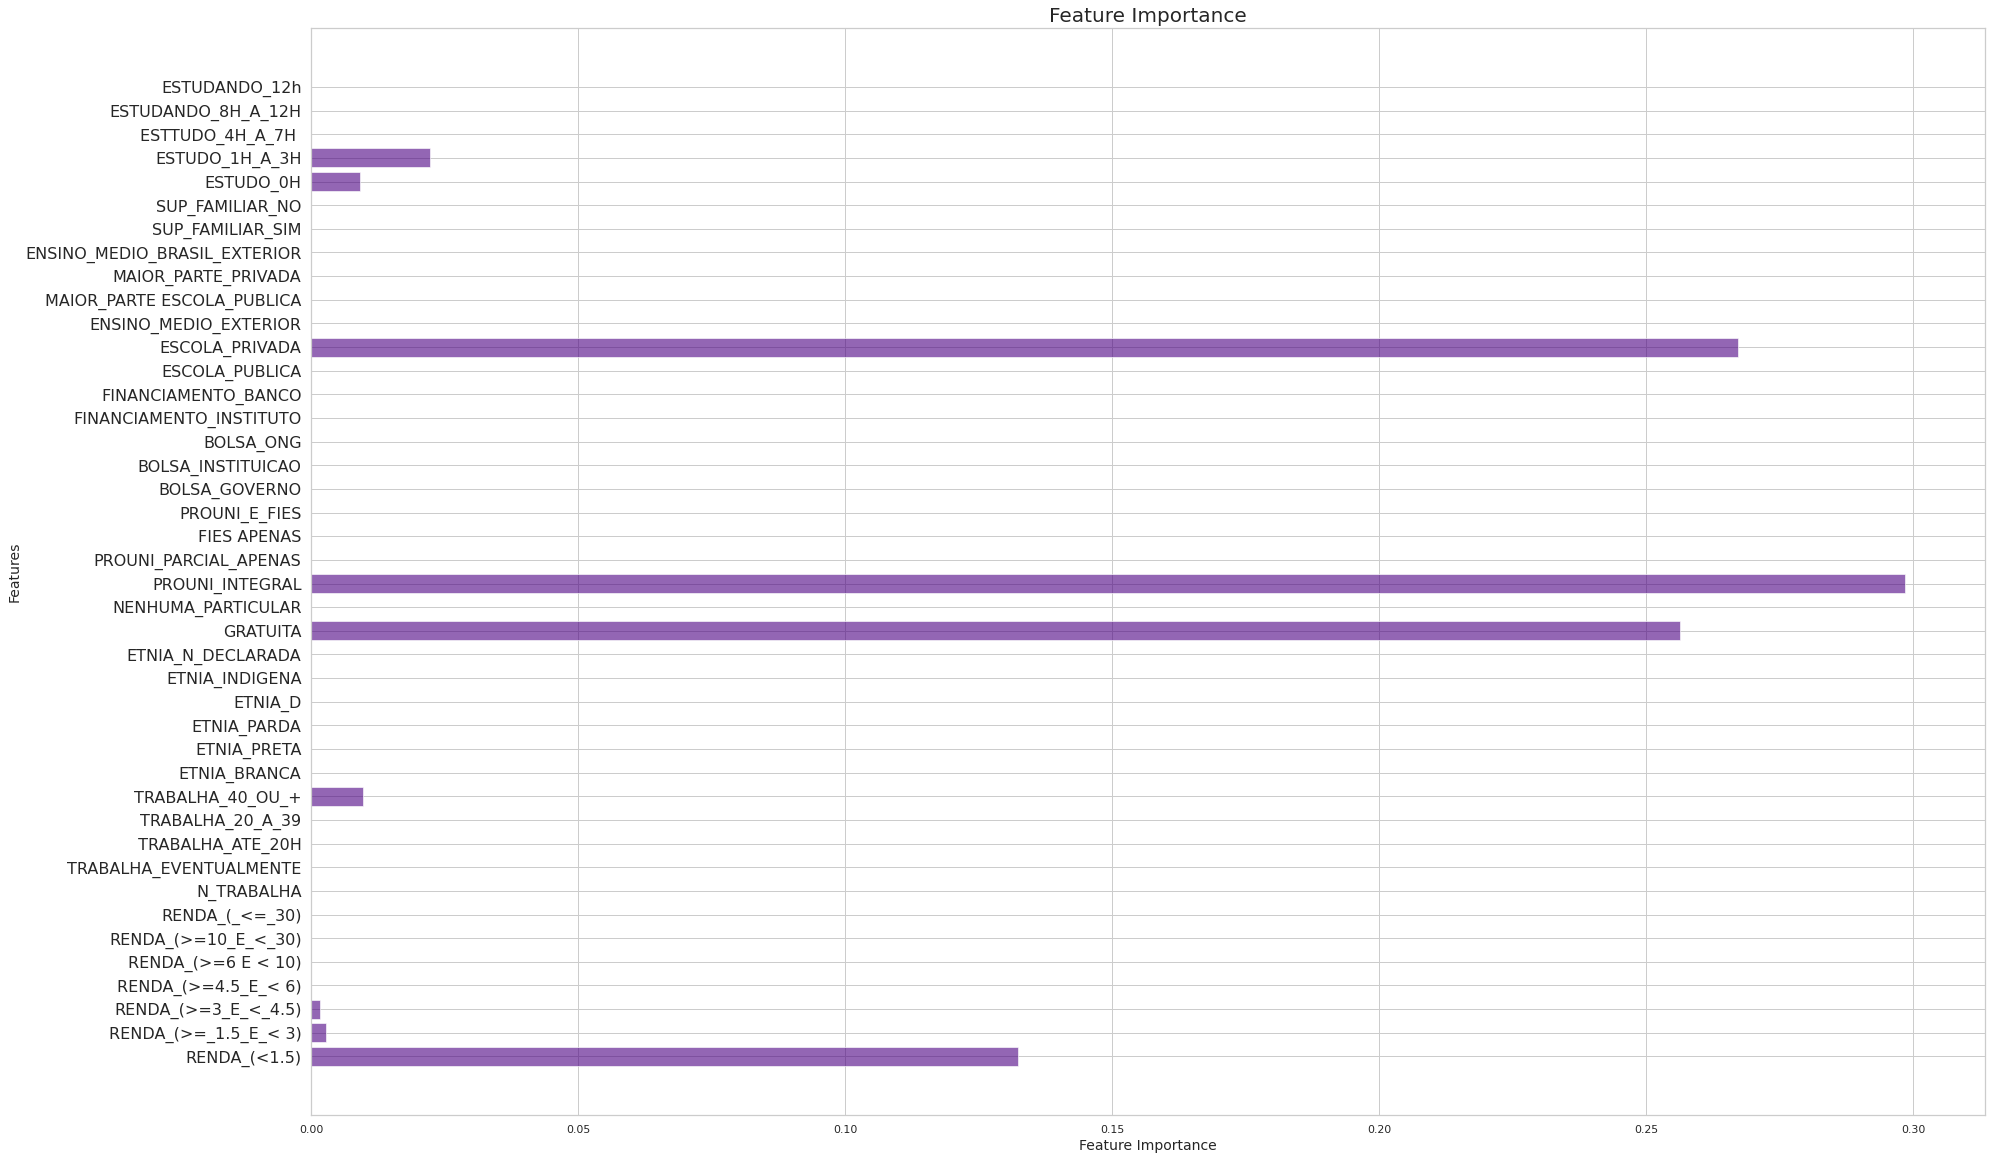

In [254]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(30, 20))
fig.tight_layout()
plt.barh(range(len(features)), tree.feature_importances_, color="indigo", align="center", alpha=0.6)
plt.yticks(np.arange(len(features)), features, rotation=0, fontsize=14)
plt.yticks(fontsize=16)
plt.ylabel("Features", fontsize=14)
plt.xlabel("Feature Importance", fontsize=14)
plt.title('Feature Importance', fontsize=20)
plt.plot()

#### Dependencia do modelo em relação as principais features
##### Classe B e C
###### atributos que não aparecem no plot tiveram peso igual a 0

In [255]:
dep = ['ESTUDO_1H_A_3H', 'ESCOLA_PRIVADA', 'PROUNI_INTEGRAL', 'GRATUITA', 'TRABALHA_40_OU_+', 'RENDA_(>=10_E_<_30)', 'SUP_FAMILIAR_SIM']
tree_disp_c = plot_partial_dependence(tree, x_train,dep, target = "C" )
plt.clf()
tree_disp_b = plot_partial_dependence(tree, x_train,dep, target = "B" )
plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Classe C')

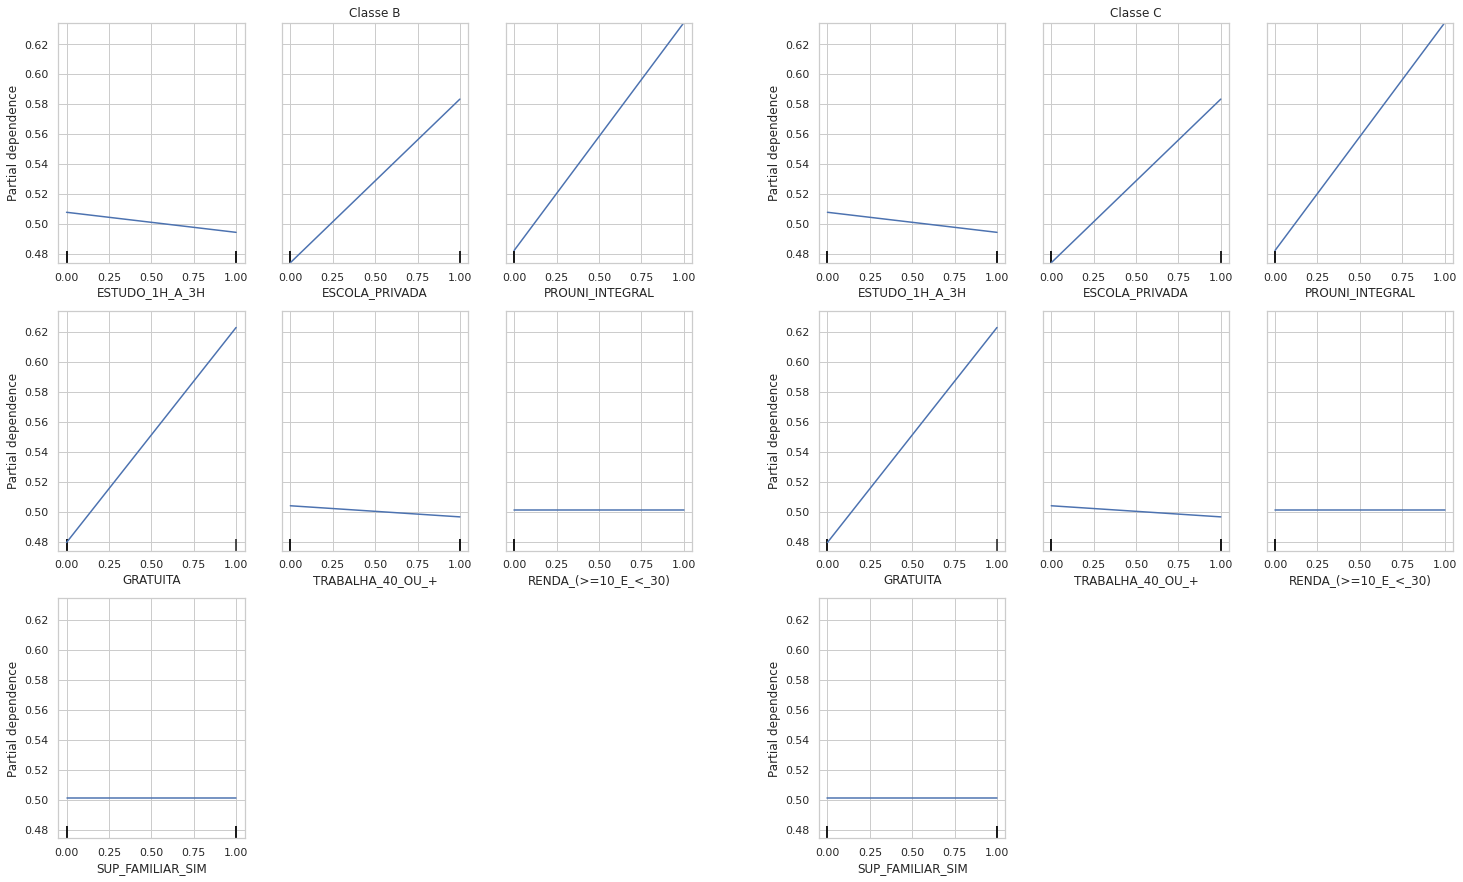

In [256]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 15))
tree_disp_b.plot(ax =ax1)
tree_disp_c.plot(ax = ax2)
ax1.set_title("Classe B")
ax2.set_title("Classe C")


### Plotando arvore

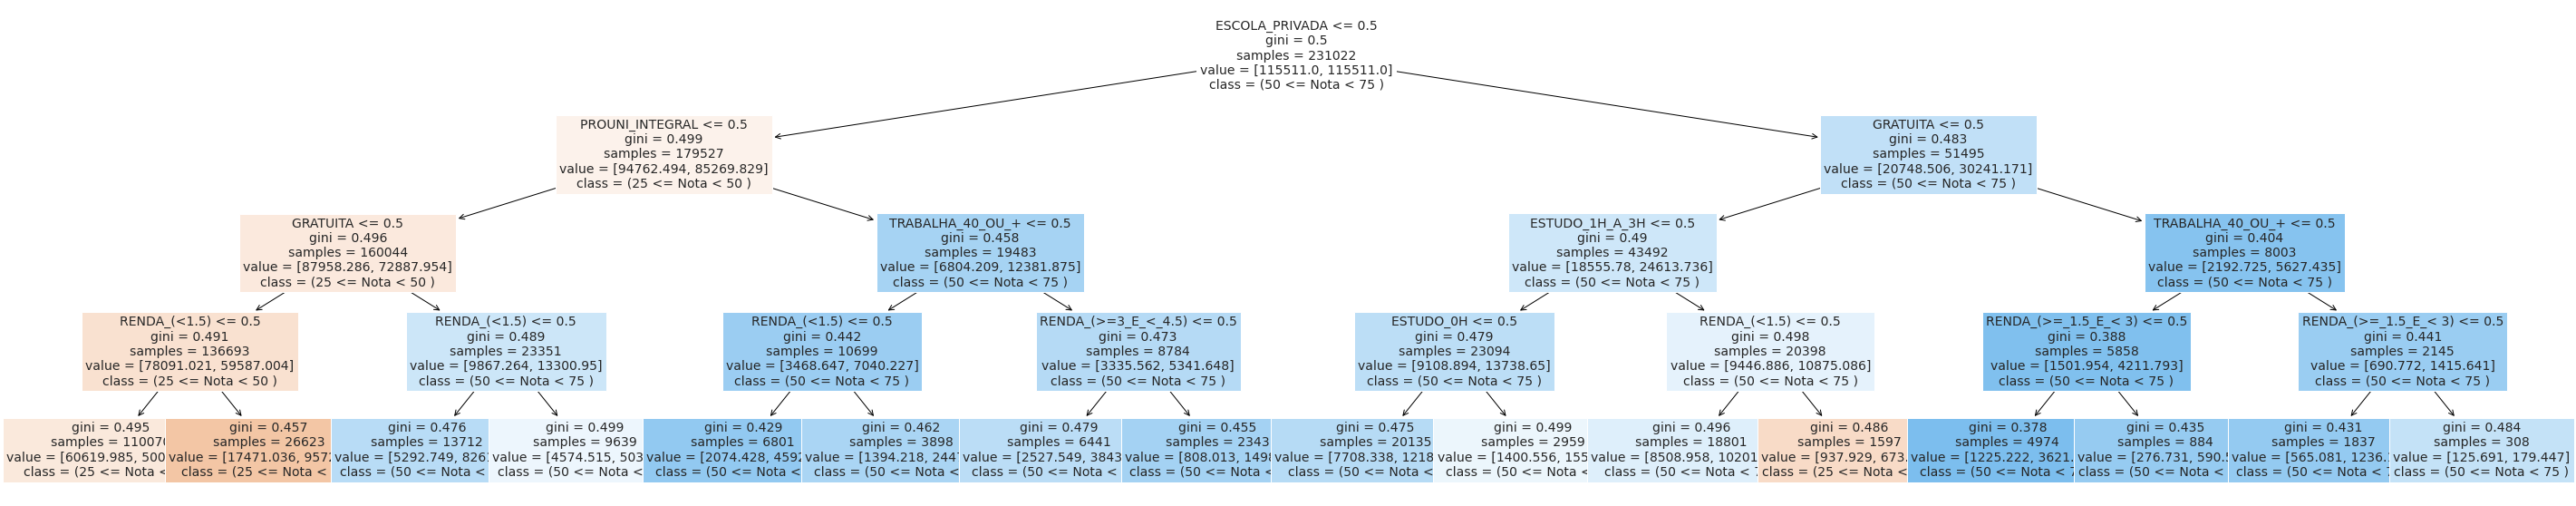

In [257]:
fig = plt.figure(figsize=(50,10))
out = plot_tree(tree, 
              feature_names=features,  
              class_names=["(25 <= Nota < 50 )",  "(50 <= Nota < 75 )"],
              filled=True,
              fontsize=14)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.savefig('2018_2.png')

## Resultados

Foram geradas duas árvores, a primeira árvore para as classes A e D e a segunda referente às classes B e C  para extrair o maior número de perfis e aumentar a acurácia para classes pouco representativas. A  árvore 1 tem  a acurácia de 0.77 e a árvore 2 possui acurácia de 0.60 possuindo 4 níveis de profundidade. Ambas as árvores possuíram um desempenho maior após a diminuição dos parâmetros passados para o modelo,a retirada de parâmetros referentes a localização do estudante possuíam uma importância que tende a zero.


Também foram medidos valores referentes ao Recall, a frequência em que o modelo encontrou uma determinada classe; e a Precisão, que é a razão entre o número de True Positive pela soma dos False Positive com o True Positive ;e o F1-Score, que representa a relação entre o Recall e a Precisão. Essas métricas de avaliação do modelo estão expressas na tabela 2. A precisão de cada classe é influenciada tanto pela diversidade de perfis de alunos quanto pela quantidade de informações. Pode -se observar também que o  modelo classifica muitos falsos positivos para classes com número muito grande de dados.As variáveis com maior impacto nos modelos foram o faculdade pública (0.24), bolsa prouni  (0,19) e estudo na a escola privada(0.42). A presença desses campos marcam os nós principais das árvores.

Os perfis gerados tiveram algumas semelhanças, A classe de alunos A teve como principal perfil pessoas que não estudam em faculdades públicas entretanto estudaram em escolas não particulares e não participam do programa de bolsas PROUNI, além de não possuírem uma renda entre 10 e 30 salários mínimos, a quantidade de alunos que se enquadram nesse perfil são de 21773 alunos. Para a classe D, existiram inúmeros perfis, entretanto, os dois perfis que mais se destacaram estudam em escola particular,  contudo o primeiro perfil, com 3784 alunos, não estudava de 1 hora há 3 horas por semana e não possuíam uma renda de entre 10 e 30 salários mínimos; o segundo perfil, com 2890 alunos, estudaram em escola pública, não trabalham mais de 40 horas semanais e não possuem uma renda menor que 1.5 salários mínimos.Os alunos da classe B tiveram um perfil similar a classe A,com 127707 alunos, entretanto, os alunos da classe C frequentaram uma escola particular e estudam em uma faculdade pública, não trabalham mais de 40 horas semanais e não possuem uma renda inferior a 1.5 salários mínimos.